In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# LASSO and RIDGE

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:>

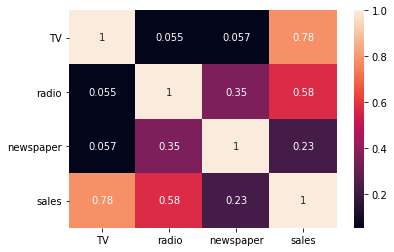

In [7]:
sns.heatmap(df.corr(), annot = True)

In [8]:
X = df.drop(['sales'], axis = 1)

In [9]:
y = df['sales']

In [11]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 1.Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
model.intercept_

2.99489303049533

In [20]:
model.coef_

array([ 0.04458402,  0.19649703, -0.00278146])

In [23]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [24]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])

In [25]:
coeff_df

,Coefficient
TV,0.044584
radio,0.196497
newspaper,-0.002781


In [26]:
y_pred = model.predict(X_test)

In [27]:
eval_metrics(y_test, y_pred)       # r2 means: how many x helps us to y predictions.

r2_score: 0.8601145185017868 
 mae: 1.3617813502090275 
 mse: 4.402118291449685 
 rmse: 2.0981225634956804


In [37]:
model.score(X_train, y_train)

0.9067114990146383

In [36]:
model.score(X_test, y_test)

0.8601145185017868

In [28]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [31]:
compare.sample(10)

,Actual,Pred
130,1.6,10.783186
123,15.2,15.247493
125,10.6,9.129245
111,21.8,21.173208
74,17.0,17.306513
146,13.2,15.109746
22,5.6,6.569744
60,8.1,5.713609
106,7.2,6.188351
122,11.6,13.409916


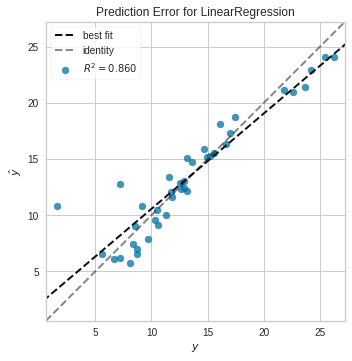

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [35]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

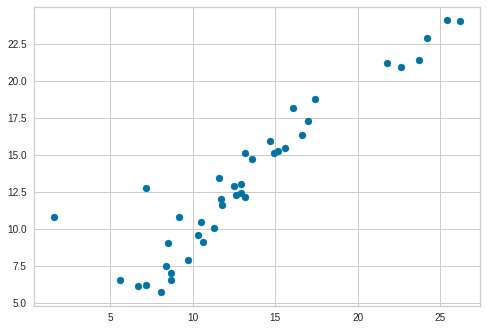

In [38]:
plt.scatter(y_test, y_pred)

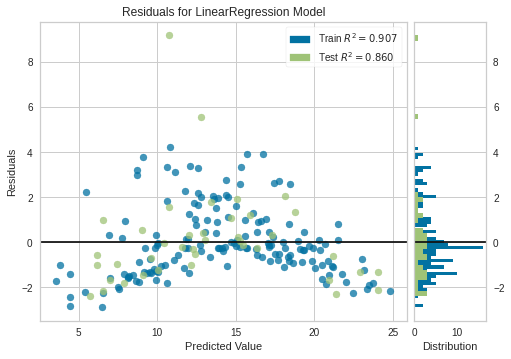

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [39]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

# Model Score with Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

In [49]:
accuraries = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8832984266379699

In [50]:
accuraries

array([0.88570699, 0.91205792, 0.93210001, 0.8618314 , 0.89579363,
       0.93868657, 0.79885218, 0.92502874, 0.75344298, 0.92948385])

In [51]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=model, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
accuraries.mean()

-2.611232315558323

In [52]:
accuraries

array([-1.71524789, -1.67158319, -1.83164463, -4.44175358, -1.22520234,
       -2.78857297, -3.57788547, -2.46388059, -4.00592555, -2.39062693])

# 2. Ridge Regression

In [53]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [54]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
scaler.fit(X_train)

StandardScaler()

In [58]:
X_train.head()

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [60]:
X_train = scaler.transform(X_train)

In [61]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [62]:
a = pd.DataFrame(X_train, columns = X.columns)

In [63]:
a.head()

,TV,radio,newspaper
0,-1.341553,1.035518,1.659411
1,-1.405314,0.082496,-1.306297
2,-0.089952,0.402439,-0.819809
3,0.697613,-0.189796,-0.908687
4,0.766097,0.014423,1.285189


In [65]:
X_test = scaler.transform(X_test)

In [68]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

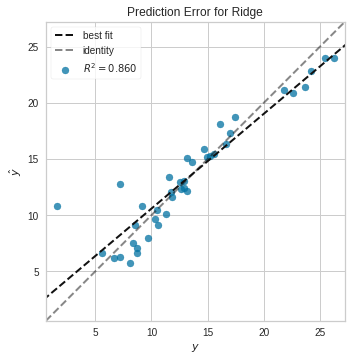

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [70]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(ridge_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [71]:
eval_metrics(y_test, y_pred) 

r2_score: 0.8599750723184534 
 mae: 1.3609514322231928 
 mse: 4.406506585272248 
 rmse: 2.0991680698010455


In [72]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)   # cross-validation
accuraries.mean()

0.8836067293821358

In [73]:
dir(ridge_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'alpha',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'n_features_in_',
 'n_iter_',
 'normalize',
 'predict',
 'random_state',
 'score',
 'set_params',
 'solver',
 'tol']

In [75]:
ridge_model.alpha

1.0

In [77]:
ridge_model = Ridge(alpha = 3).fit(X_train, y_train)         # change alpha to 3
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8594890418838019 
 mae: 1.36001054722465 
 mse: 4.421801692696301 
 rmse: 2.102808049417802


In [79]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [80]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)               # finding best alpha with cv
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [82]:
ridgecv.alpha_                  # best alpha

3.7181818181818183

In [85]:
ridge_model = Ridge(alpha = ridgecv.alpha_ ).fit(X_train, y_train)         # change alpha to best alpha
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8592507058288468 
 mae: 1.3603722782157435 
 mse: 4.42930199577131 
 rmse: 2.1045906955442213


In [86]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)   # cross-validation
accuraries.mean()

0.8839573697165001

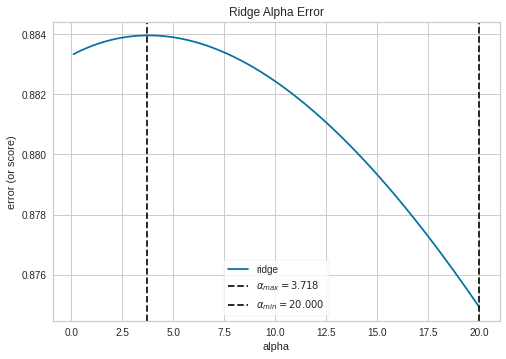

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [88]:
# we can find same alpha (best alpha) with yellowbrick

from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show()

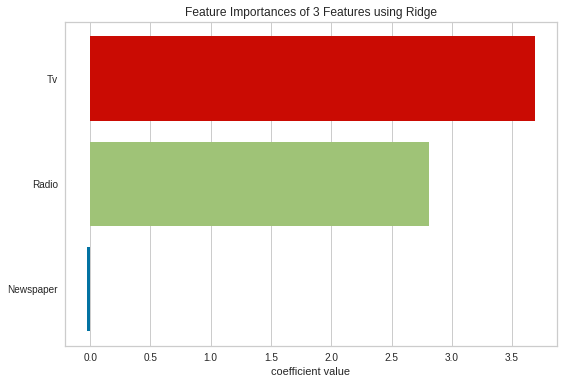

<AxesSubplot:title={'center':'Feature Importances of 3 Features using Ridge'}, xlabel='coefficient value'>

In [89]:
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [90]:
ridge_model.coef_

array([ 3.6896364 ,  2.81415098, -0.02596119])

# 3. Lasso Regression

In [91]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [92]:
lasso_model = Lasso()                             # data has be scaled before
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7900277437769083 
 mae: 1.6452603285991416 
 mse: 6.607710106273169 
 rmse: 2.570546655144226


In [93]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)   # cross-validation
accuraries.mean()

0.8155099608241121

In [94]:
lasso_model.alpha

1.0

In [95]:
alpha_space = np.linspace(0.1, 20, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [96]:
lasso_cv_model.alpha_

0.1

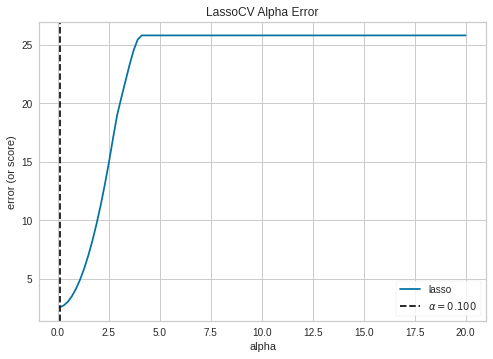

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [99]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [97]:
lasso_model = Lasso(lasso_cv_model.alpha_)                             
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8597421221120998 
 mae: 1.362866639662895 
 mse: 4.413837398687646 
 rmse: 2.1009134676820094


In [98]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)   # cross-validation
accuraries.mean()

0.8852431100584155

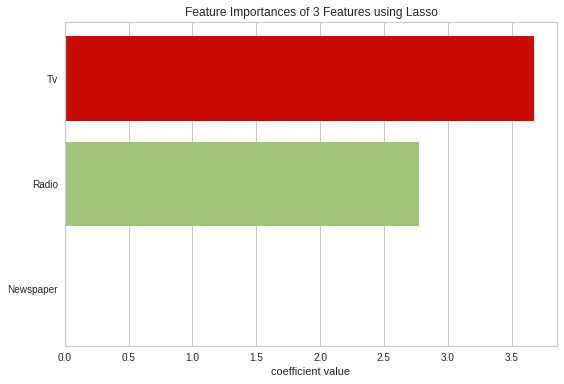

<AxesSubplot:title={'center':'Feature Importances of 3 Features using Lasso'}, xlabel='coefficient value'>

In [100]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [102]:
lasso_model.coef_

array([ 3.6743777 ,  2.77183858, -0.        ])

# 4. Elastic Net

In [103]:
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(alphas=alpha_space, l1_ratio=[.1, .5, .7,.9, .95, .99, 1])

In [105]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [107]:
elastic_model.l1_ratio_

1.0

In [109]:
elastic_model.alpha_

0.1

In [110]:
y_pred = elastic_model.predict(X_test)

In [111]:
eval_metrics(y_test, y_pred)

r2_score: 0.8597421221120998 
 mae: 1.362866639662895 
 mse: 4.413837398687646 
 rmse: 2.1009134676820094


In [112]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=elastic_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8852431100584155

# 5. Polynomial Regression

In [114]:
# we will use not scaled (X will be original X)
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(200, 10)

In [115]:
X.shape

(200, 3)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [117]:
model = LinearRegression()

In [118]:
model.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred = model.predict(X_test)

In [120]:
eval_metrics(y_test, y_pred)

r2_score: 0.9843529333146829 
 mae: 0.4896798044802885 
 mse: 0.441750551040247 
 rmse: 0.6646431757268308


In [121]:
accuraries = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.9814092804779199

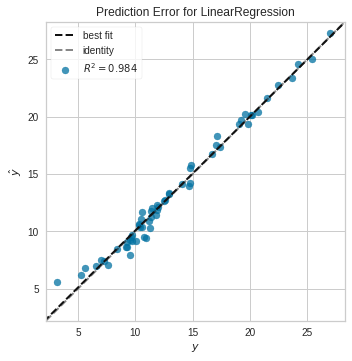

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [122]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()